# Qubit tutorial for MESolve.jl.

#### This tutorial outlines various features of MESolve with the pragmatic example of a single qubit.

In [234]:
using MESolve, PyPlot, LinearAlgebra, DifferentialEquations

#### Create the time-independent part of the qubit Hamiltonian

In [146]:
H_z = [1.0 0.0;0.0 -1.0]/2

2×2 Array{Float64,2}:
 0.5   0.0
 0.0  -0.5

#### Create the static dissipation, in this case simple excitation decay

In [5]:
rates = [0.01]; # Rate
Gamma = zeros(2,2,1) # This is needed since MESolve expectes a 3D array for the decoherence operators
Gamma[:,:,1] = [0.0 0.0; 1.0 0.0]; # Operator
Gamma

2×2×1 Array{Float64,3}:
[:, :, 1] =
 0.0  0.0
 1.0  0.0

## Time-independent evolution: Qubit decay

In [70]:
rho_in = [1.0 0.0;0.0 0.0] # Excited state
t0 = 0.0 # Initial time
tf = 100.0 # Final time
tvec, rho_out = me_solve_time_independent(rho_in,H_z,Gamma,rates,t0,tf);

#### Let's examine the output

In [10]:
tvec

101-element Array{Float64,1}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮  
  89.0
  90.0
  91.0
  92.0
  93.0
  94.0
  95.0
  96.0
  97.0
  98.0
  99.0
 100.0

In [11]:
rho_out

101-element Array{Array{Complex{Float64},2},1}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]                                                                
 [0.9900498337491681 + 0.0im 0.0 + 0.0im; 0.7004771478969182 - 0.44710005750080445im 0.009950166250831952 + 0.0im] 
 [0.9801986733067554 + 0.0im 0.0 + 0.0im; 0.8009402561503403 + 0.38078666191251886im 0.019801326693244678 + 0.0im] 
 [0.970445533548508 + 0.0im 0.0 + 0.0im; -0.003639902858883111 + 0.13769422487966487im 0.02955446645149202 + 0.0im]
 [0.9607894391523233 + 0.0im 0.0 + 0.0im; 0.5358462863041281 - 0.4808298220310795im 0.03921056084767679 + 0.0im]   
 [0.9512294245007141 + 0.0im 0.0 + 0.0im; 0.8584902059667661 + 0.2722805423043079im 0.0487705754992859 + 0.0im]    
 [0.9417645335842489 + 0.0im 0.0 + 0.0im; 0.029874592575591184 + 0.26078173009692424im 0.05823546641575119 + 0.0im]
 [0.9323938199059484 + 0.0im 0.0 + 0.0im; 0.3704603339844894 - 0.4756296580003823im 0.06760618009405173 + 0.0im]   
 [0.923116346386636 + 0.

#### Now let's plot the system energy as a function of time.

In [71]:
energy = zeros(length(tvec))
for ii = 1:1:length(tvec)
    energy[ii] = tr(H_z*rho_out[ii])
end

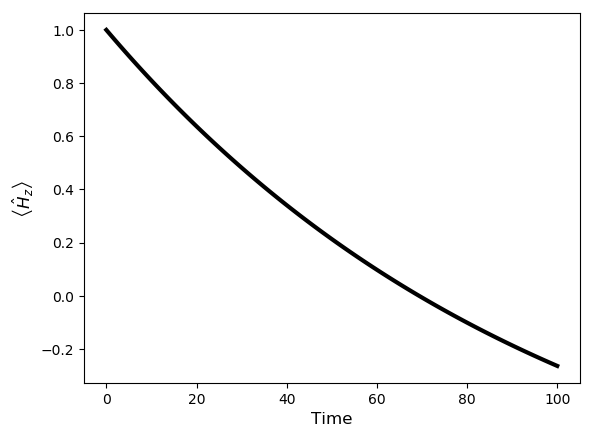

In [72]:
plot(tvec,energy,"-k",linewidth=3)
xlabel("Time",fontsize=12)
ylabel(L"$\left<\hat{H}_z\right>$",fontsize=12);

#### Now let's control the output times

In [73]:
tstep = tf/10; # Default tstep = (tf-t0)/100
tvec, rho_out = me_solve_time_independent(rho_in,H_z,Gamma,rates,t0,tf;tstep=tstep);

In [32]:
tvec

11-element Array{Float64,1}:
   0.0
  10.0
  20.0
  30.0
  40.0
  50.0
  60.0
  70.0
  80.0
  90.0
 100.0

In [33]:
rho_out

11-element Array{Array{Complex{Float64},2},1}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]                                                               
 [0.9048374180359597 + 0.0im 0.0 + 0.0im; 0.21463911721751885 - 0.4332694467966804im 0.09516258196404036 + 0.0im] 
 [0.8187307530779819 + 0.0im 0.0 + 0.0im; 0.6262290641328454 - 0.331427298129677im 0.18126924692201815 + 0.0im]   
 [0.7408182206817181 + 0.0im 0.0 + 0.0im; 0.6514285609654813 + 0.1419430715575258im 0.2591817793182822 + 0.0im]   
 [0.6703200460356395 + 0.0im 0.0 + 0.0im; 0.2078230493483208 + 0.4144216061871452im 0.32967995396436056 + 0.0im]  
 [0.6065306597126334 + 0.0im 0.0 + 0.0im; -0.23763462757790527 + 0.19453829682464038im 0.3934693402873667 + 0.0im]
 [0.5488116360940267 + 0.0im 0.0 + 0.0im; -0.25119154078955075 - 0.2230808648431899im 0.45118836390597344 + 0.0im]
 [0.4965853037914097 + 0.0im 0.0 + 0.0im; 0.0772008656811936 - 0.34609564225353956im 0.5034146962085905 + 0.0im]  
 [0.4493289641172218 + 0.0im 0.0 

In [74]:
energy = zeros(length(tvec))
for ii = 1:1:length(tvec)
    energy[ii] = tr(H_z*rho_out[ii])
end

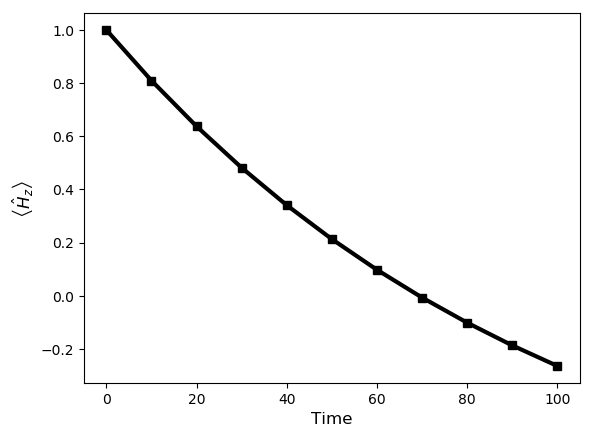

In [75]:
plot(tvec,energy,"-ks",linewidth=3)
xlabel("Time",fontsize=12)
ylabel(L"$\left<\hat{H}_z\right>$",fontsize=12);

#### Finally let's control the tolerance of the solver.

In [229]:
tstep = tf/10; # Default tstep = (tf-t0)/100
tvec, rho_out = me_solve_time_independent(rho_in,H_z,Gamma,rates,t0,tf;tstep=tstep,tols=[1e-8,1e-5]); 
# Default is tols = [1e-6,1e-5]

In [230]:
energy = zeros(length(tvec))
for ii = 1:1:length(tvec)
    energy[ii] = tr(H_z*rho_out[ii])
end

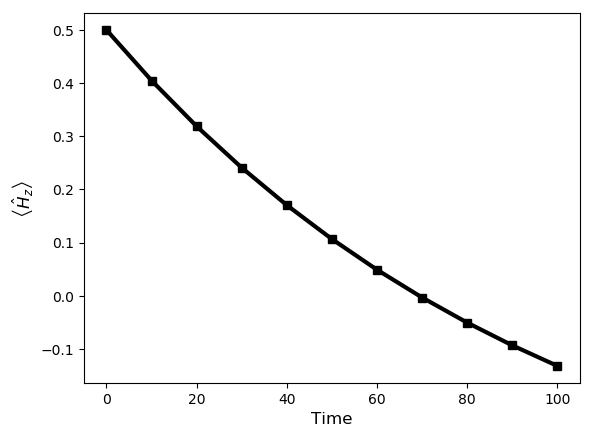

In [231]:
plot(tvec,energy,"-ks",linewidth=3)
xlabel("Time",fontsize=12)
ylabel(L"$\left<\hat{H}_z\right>$",fontsize=12);

#### You can also control the algorithm the differential equation solver uses, and Julia offers a wide variety of options. See https://docs.juliadiffeq.org/latest/solvers/ode_solve/ for a full list.

In [235]:
# This is the default solver.
tvec, rho_out = me_solve_time_independent(rho_in,H_z,Gamma,rates,t0,tf;tstep=tstep,tols=[1e-6,1e-3],alg = Tsit5()); 

#### The optional arguments discussed in the last three examples (time step, tolerance, and solver algorithm) can also be manually set in the time-dependent master equation solvers discussed in the following.

## Time-dependent Hamiltonian evolution: Driven qubit decay

#### Now for some driven evolution. We'll do something less than clever to emphasize how this works. We'll drive a qubit resonantly, but not go to the rotating frame, so that the Hamiltonian remains time-dependent.

#### There are two ways to do time-dependent Hamiltonians. 

#### The first uses a matrix function to define the Hamiltonian at each point in time. This function must be defined in place, which means that it takes as its first argument a matrix of the same dimension of the Hamiltonian, and as it's second argument a scalar argument that is the time. The function should return nothing.

In [172]:
function H_tot(H_temp::Array{ComplexF64,2},t::Float64)
    H_temp[:,:] = H_z .+ 0.1*cos(t)*[0. 1.;1. 0.]
    return nothing
end

H_tot (generic function with 1 method)

In [198]:
t0 = 0.0 # Initial time
tf = 100.0 # Final time
tvec, rho_out = me_solve_H_time_dependent(rho_in,H_tot,Gamma,rates,t0,tf);

In [107]:
tvec

101-element Array{Float64,1}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮  
  89.0
  90.0
  91.0
  92.0
  93.0
  94.0
  95.0
  96.0
  97.0
  98.0
  99.0
 100.0

In [78]:
rho_out

101-element Array{Array{Complex{Float64},2},1}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]                                                                   
 [0.9830654618379342 + 0.0im 0.0 + 0.08276500354188657im; 0.0 - 0.08276500354188657im 0.016934538162065835 + 0.0im]   
 [0.972132632004998 + 0.0im 0.0 + 0.08893424917043434im; 0.0 - 0.08893424917043434im 0.027867367995001988 + 0.0im]    
 [0.9704808498376143 + 0.0im 0.0 + 0.016191734126525574im; 0.0 - 0.016191734126525574im 0.029519150162385682 + 0.0im] 
 [0.9562170238122233 + 0.0im 0.0 - 0.0671551610691897im; 0.0 + 0.0671551610691897im 0.0437829761877767 + 0.0im]       
 [0.9436524650186511 + 0.0im 0.0 - 0.08507872481924988im; 0.0 + 0.08507872481924988im 0.05634753498134878 + 0.0im]    
 [0.9416652317591914 + 0.0im 0.0 - 0.024633567395179478im; 0.0 + 0.024633567395179478im 0.05833476824080855 + 0.0im]  
 [0.9292254944057756 + 0.0im 0.0 + 0.057087844550319795im; 0.0 - 0.057087844550319795im 0.07077450559422421 + 0.0im]  


In [199]:
energy = zeros(length(tvec))
for ii = 1:1:length(tvec)
    energy[ii] = tr(H_z*rho_out[ii])
end

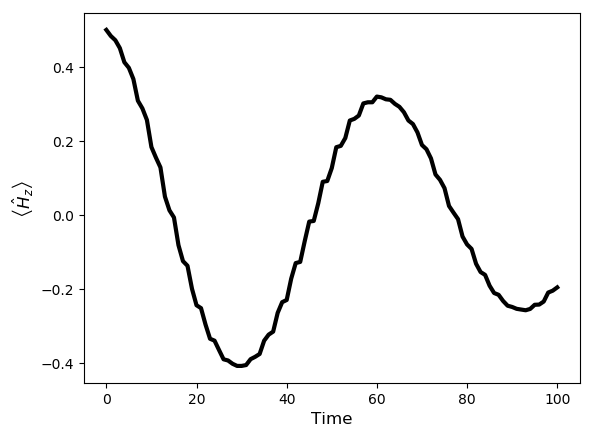

In [200]:
plot(tvec,energy,"-k",linewidth=3)
xlabel("Time",fontsize=12)
ylabel(L"$\left<\hat{H}_z\right>$",fontsize=12);

#### This looks as expected, and those extra small wiggles you see are from the counter-rotating terms.

#### Now we'll use the second way to simulate time-dependent Hamiltonians. This requires a 3D array that stores the matrices of an operator basis for the Hamiltonian, and a function that returns a vector given a scalar input (time). Each element of this output vector is the prefactor for the corresponding element of the matrix basis array. The basis does not have to be complete, you just need all the operators that have nonzero prefactor at some point in time.

#### In other words, we describe our time-dependent Hamiltonian as

#### H(t) = sum_i f_i(t) H_i

#### and we compile all the matrices H_i in a 3D array, and the f_i(t) are the elements of the output vector of a function we define. I've been saying output of the function, but really this function also has to be defined in place, and outputs nothing.

#### Let's see this with the same example as before, but this time dropping the counter rotating terms, so that we'll need three operators in our basis and a function that returns a 3-element vector.

In [193]:
Hops = zeros(2,2,3)
Hops[:,:,1] = [0. 0.;1. 0.]
Hops[:,:,2] = [0. 1.;0. 0.]
# Don't forget the static Hamiltonian
Hops[:,:,3] = H_z 

function Hfunc(vec_out::Array{Complex{Float64},1},t::Float64) 
    vec_out[:] =[0.05*exp(1im*t),0.05*exp(-1im*t),1.0]
   return nothing 
end

Hfunc (generic function with 2 methods)

In [201]:
t0 = 0.0 # Initial time
tf = 100.0 # Final time
tvec, rho_out = me_solve_H_time_dependent(rho_in,Hops,Hfunc,Gamma,rates,t0,tf);

In [195]:
tvec

101-element Array{Float64,1}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮  
  89.0
  90.0
  91.0
  92.0
  93.0
  94.0
  95.0
  96.0
  97.0
  98.0
  99.0
 100.0

In [189]:
rho_out

101-element Array{Array{Complex{Float64},2},1}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]                                                                                                      
 [0.990033399528297 + 0.0im 0.08358751929593497 + 0.05367093005214894im; 0.08358751929593497 - 0.05367093005214894im 0.009966600471702947 + 0.0im]       
 [0.9605319227606434 + 0.0im 0.1770499987002377 - 0.08102673458083637im; 0.1770499987002377 + 0.08102673458083637im 0.03946807723935663 + 0.0im]         
 [0.9126724416121587 + 0.0im 0.03984306144800889 - 0.2795048083492065im; 0.03984306144800889 + 0.2795048083492065im 0.0873275583878413 + 0.0im]          
 [0.8483494690249054 + 0.0im -0.2714568626526192 - 0.23444859820437614im; -0.2714568626526192 + 0.23444859820437614im 0.1516505309750946 + 0.0im]        
 [0.7701599968708955 + 0.0im -0.40348728863727157 + 0.11936608577462637im; -0.40348728863727157 - 0.11936608577462637im 0.2298400031291044 + 0.0im]      
 [0.6811740874826502 + 0.0im

In [202]:
energy = zeros(length(tvec))
for ii = 1:1:length(tvec)
    energy[ii] = tr(H_z*rho_out[ii])
end

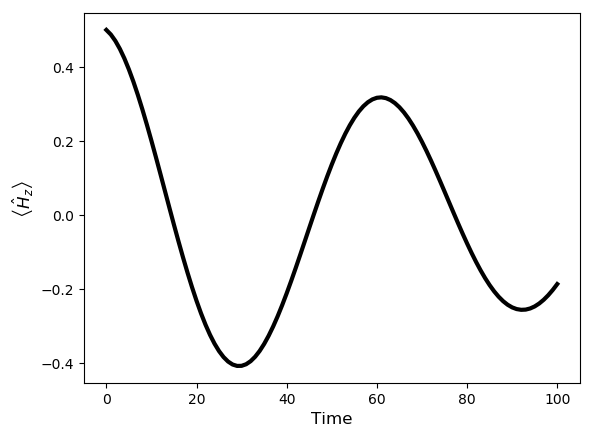

In [203]:
plot(tvec,energy,"-k",linewidth=3)
xlabel("Time",fontsize=12)
ylabel(L"$\left<\hat{H}_z\right>$",fontsize=12);

## Time-dependent Hamiltonian and dissipator

#### MESolve.jl also has functionality for a time-dependent dissipative evolution. Right now, the only way to implement this is with a 3D array storing a basis of Lindblad operators for a diagonal Lindblad equation, and a function outputing (actually outputing, not an in place function) a vector that contains the rates for each of those operators. This is similar to the second implementation of a time-dependent Hamiltonian described earlier, but is not fully general, since the basis of the diagonal Lindblad equation could also change as a function of time.

#### We'll jump right ahead to implementing a time-dependent dissipative and Hamiltonian evolution. Due to historic reasons (i.e. the development of the MESolve.jl codebase), the only way to do this right now is with a matrix function for the Hamiltonian, which, unlike in the other solvers, should not be defined in place, while the dissipation uses the operator basis, rate vector encoding described earlier.

In [208]:
function H_tot_2(t::Float64)
    return H_z .+ 0.1*cos(t)*[0. 1.;1. 0.]
end

H_tot_2 (generic function with 1 method)

In [223]:
rate_func(t::Float64) = [0.05]*tanh(t); # Time-dependent rate function
Gamma = zeros(2,2,1) # This is needed since MESolve expects a 3D array for the decoherence operators
Gamma[:,:,1] = [0.0 0.0; 1.0 0.0]; # Operator

In [226]:
t0 = 0.0 # Initial time
tf = 100.0 # Final time
tvec, rho_out = me_solve_full_time_dependent(rho_in,H_tot_2,Gamma,rate_func,t0,tf);

In [211]:
tvec

101-element Array{Float64,1}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮  
  89.0
  90.0
  91.0
  92.0
  93.0
  94.0
  95.0
  96.0
  97.0
  98.0
  99.0
 100.0

In [212]:
rho_out

101-element Array{Array{Complex{Float64},2},1}:
 [1.0 + 0.0im 0.0 + 0.0im; 0.0 + 0.0im 0.0 + 0.0im]                                                                                                                                         
 [0.9891722465168659 + 0.0im 0.041825498048499096 + 0.06843049298239945im; 0.041825498048499096 - 0.06843049298239945im 0.010827753483134202 + 0.0im]                                       
 [0.9786896321263844 + 0.0im 0.08959670081010387 + 0.0037249816102400066im; 0.08959670081010387 - 0.0037249816102400066im 0.021310367873615666 + 0.0im]                                     
 [0.9573857406420763 + 0.0im 0.021873736589075148 - 0.135666227556421im; 0.021873736589075148 + 0.135666227556421im 0.042614259357923887 + 0.0im]                                           
 [0.9188775769886522 + 0.0im -0.1405989784767236 - 0.15605707648493725im; -0.1405989784767236 + 0.15605707648493725im 0.08112242301134784 + 0.0im]                                          
 [0.903

In [227]:
energy = zeros(length(tvec))
for ii = 1:1:length(tvec)
    energy[ii] = real(tr(H_z*rho_out[ii])) 
    # This is a more complicated problem so the solver introduces a tiny amount of imaginary error.
end

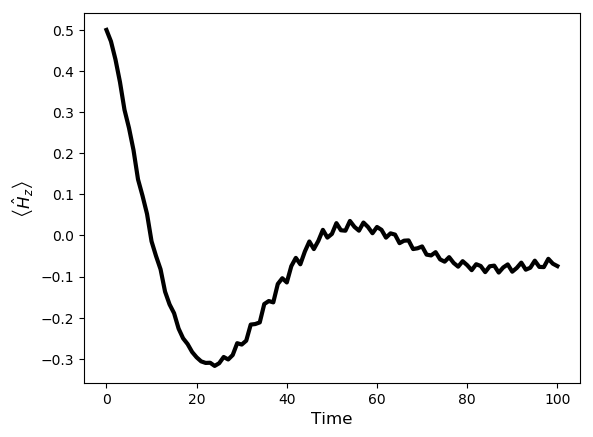

In [228]:
plot(tvec,energy,"-k",linewidth=3)
xlabel("Time",fontsize=12)
ylabel(L"$\left<\hat{H}_z\right>$",fontsize=12);